In [1]:
import pandas as pd

In [30]:
file="fire_nrt_V1_96617.csv"
df=pd.read_csv(file,parse_dates=["acq_date"])

In [31]:
df.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D


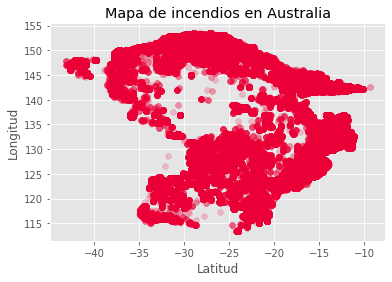

In [32]:
import matplotlib.pyplot as plt
x=df.latitude
y=df.longitude
plt.scatter(x=x,y=y,alpha=0.2,color="#ef0037")
plt.style.use("ggplot")
plt.title("Mapa de incendios en Australia")
plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.show()

In [33]:
dianoche=pd.get_dummies(df["daynight"])

In [34]:
confidence=pd.get_dummies(df["confidence"])

In [35]:
df2=pd.concat([df,dianoche,confidence],axis=1)

In [36]:
df2.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,D,N,h,l,n
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D,1,0,0,0,1
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D,1,0,0,0,1
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D,1,0,0,0,1
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D,1,0,0,0,1
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D,1,0,0,0,1


In [37]:
df3=df2.drop(["satellite","instrument","version","daynight","confidence"],axis=1)

In [38]:
df3.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,bright_ti5,frp,D,N,h,l,n
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,293.4,4.0,1,0,0,0,1
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,296.9,3.9,1,0,0,0,1
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,295.3,3.7,1,0,0,0,1
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,294.2,6.2,1,0,0,0,1
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,293.5,4.1,1,0,0,0,1


In [39]:
incendiosdia=df3.D.sum()

In [40]:
incendiosnoche=df3.N.sum()

In [41]:
incendiostotales=incendiosdia+incendiosnoche

In [42]:
porcentajadia=(incendiosdia*100)/(incendiostotales)
porcentajadia

48.3835412446654

In [43]:
porcentajenoche=(incendiosnoche*100)/(incendiostotales)
porcentajenoche

51.6164587553346

## El 51.6% de los incendios ocurren en la noche, mientras que el 48.6% restante ocurren en el día

In [44]:
df3=df3.rename(columns={"D":"Day","N":"Night"})

In [45]:
df3.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,bright_ti5,frp,Day,Night,h,l,n
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,293.4,4.0,1,0,0,0,1
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,296.9,3.9,1,0,0,0,1
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,295.3,3.7,1,0,0,0,1
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,294.2,6.2,1,0,0,0,1
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,293.5,4.1,1,0,0,0,1


In [46]:
df3.describe()

,latitude,longitude,bright_ti4,scan,track,acq_time,bright_ti5,frp,Day,Night,h,l,n
count,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000
mean,-27.465569,142.191838,333.922148,0.460398,0.480464,986.334617,299.311259,15.557809,0.483835,0.516165,0.113366,0.080329,0.806305
std,8.008223,10.986038,21.988456,0.089811,0.118792,555.548115,14.724600,45.584396,0.499739,0.499739,0.317040,0.271802,0.395193
min,-43.212320,113.447010,208.000000,0.320000,0.360000,224.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-33.133860,132.291060,312.800000,0.390000,0.380000,418.000000,289.500000,2.100000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,-30.489390,147.987880,336.700000,0.430000,0.440000,1400.000000,295.600000,5.200000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,-19.142220,150.751010,351.000000,0.510000,0.570000,1512.000000,307.600000,13.200000,1.000000,1.000000,0.000000,0.000000,1.000000
max,-9.396500,153.452180,367.000000,0.800000,0.780000,1824.000000,380.000000,10717.200000,1.000000,1.000000,1.000000,1.000000,1.000000
